In [42]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
# Define the URLs of parenting websites to explore
website_urls = [
    'https://www.thesophistikids.com/',
    'https://babywise.life/',
    'https://www.babyearth.com/',
    'https://www.babycenter.in/',
    'https://verywellfamily.com/',
    'https://www.fatherly.com/',
    'https://mom.com/',
    'https://mightyparenting.com/',
    'https://www.scarymommy.com/',
    'https://www.thebump.com/',
    'https://www.zerotothree.org/'
    # Add more URLs as needed
]

In [44]:
# Initialize an empty list to store the website content
website_content = []

In [75]:
# Loop through the website URLs and fetch content
for url in website_urls:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract relevant text content from the website (adjust as needed)
        text_content = soup.get_text()
        website_content.append(text_content)
website_content

['\n\n\n\n\n\n\n\nThe Sophistikids | Animated Music Videos for Kids and Parents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n\n\n\n\n\n\n\n      Skip to Content\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        ABOUT\n      \n\n\n\n        WATCH & LISTEN\n      \n\n\n\n        CONTACT\n      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOpen Menu\nClose Menu\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        ABOUT\n      \n\n\n\n        WATCH & LISTEN\n      \n\n\n\n        CONTACT\n      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nOpen Menu\nClose Menu\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n        ABOUT\n      \n\n\n\n\n\n        WATCH & LISTEN\n      \n\n\n\n\n\n        CONTACT\n      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nView fullsize\n\n\n\n\n\n\n\nView fullsize\n\n\n\n\n\n\n\nView fullsize\n\n\n\n\n\n\n\nView fullsize\n\n\n\n\

In [74]:
import re

# Assuming 'website_content' is a list of strings
words_only_content = []

for text in website_content:
    # Use regular expression to extract words
    words = re.findall(r'\b\w+\b', text)
    # Join the extracted words into a single string
    words_text = ' '.join(words)
    words_only_content.append(words_text)
words_only_content

['The Sophistikids Animated Music Videos for Kids and Parents 0 Skip to Content ABOUT WATCH LISTEN CONTACT Open Menu Close Menu ABOUT WATCH LISTEN CONTACT Open Menu Close Menu ABOUT WATCH LISTEN CONTACT View fullsize View fullsize View fullsize View fullsize View fullsize View fullsize Music To Entertain Children Concepts To Entertain Adults Listen on SoundCloud Welcome to The Sophistikids Progressive intelligent and attention grabbing enjoyment for the whole family come namaste with me Baby Mixology 101 what is the sophistikids The Sophistikids is a refreshing novel marriage of both children s and adults entertainment Learn More Subscribe Sign up with your email address to receive news and updates Email Address Sign Up We respect your privacy Thank you',
 'Babywise life Official Babywise site Skip to content Search FREE Shipping on 49 orders Home Babywise Books Clothing Breastfeeding Gift Registry Brands Printables Sleep Schedules Shop Babywise Books Crib Bedding Nursery Clothing Car 

In [69]:
# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(words_only_content)

In [70]:
# Create a DataFrame for TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,00,000,007,05,09,10,100,101,101jake,108,...,வரங,సమ,ಕನ,ಞರ,ಟರ,ತಜ,ನಡ,ಮಗ,ವರ,ಷದಲ
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066345,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.124281,0.000000,0.000000,0.000000,0.022597,0.022450,0.000000,0.000000,0.000000,0.02754,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.131888,0.000000,0.000000,0.020093,0.032972,0.043677,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.008832,0.000000,0.000000,0.000000,0.043199,0.000000,0.000000,0.000000,0.00000,...,0.008832,0.008832,0.008832,0.008832,0.008832,0.008832,0.008832,0.008832,0.008832,0.008832
4,0.000000,0.000000,0.020634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.008844,0.016274,0.000000,0.008137,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.012237,0.000000,0.011085,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066345,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.draw()
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.draw()
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Matplotlib currently does not support Devanagari natively.
  bboxes = [l.get_window_extent() for l in labels]
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current f

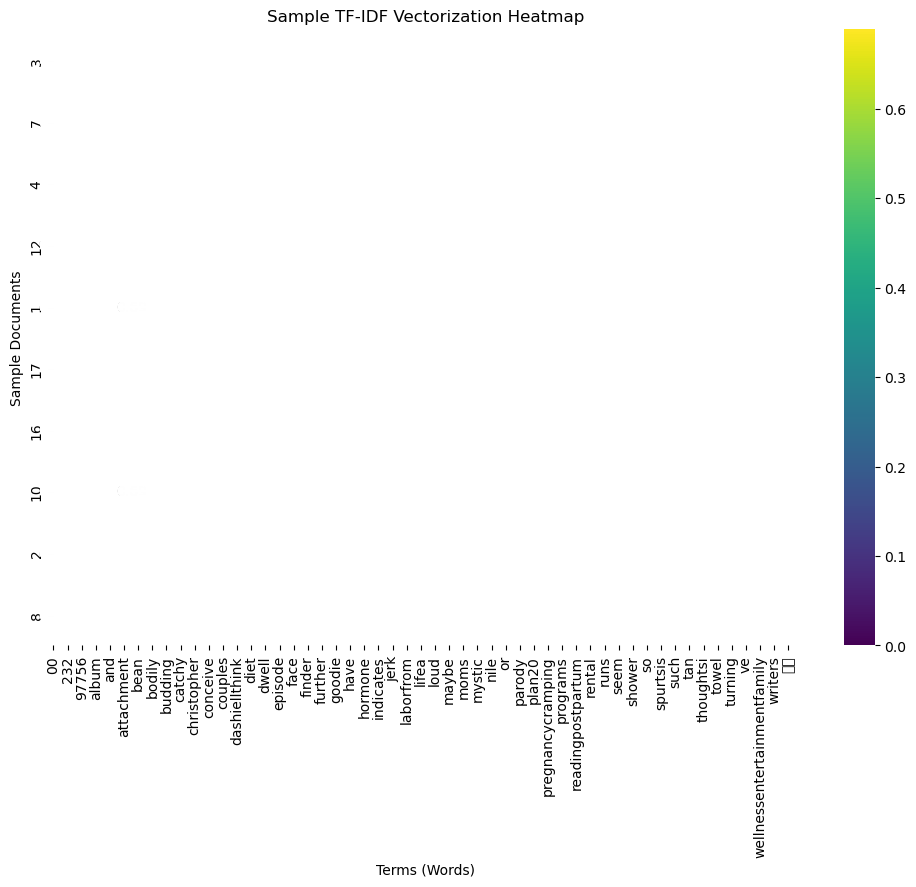

In [71]:
# Visualize TF-IDF vectors using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.sample(10), cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Sample TF-IDF Vectorization Heatmap')
plt.xlabel('Terms (Words)')
plt.ylabel('Sample Documents')
plt.show()

In [76]:
# Apply multiple machine learning algorithms
num_clusters = 5  # Number of clusters for K-Means and other algorithms (adjust as needed)

In [77]:
# K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [78]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(tfidf_matrix)

In [79]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(tfidf_matrix.toarray())

In [80]:
# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=num_clusters, eigen_solver='arpack', affinity='nearest_neighbors', n_neighbors=8)
spectral_labels = spectral_clustering.fit_predict(tfidf_matrix)

In [81]:
# Visualize the results with Matplotlib and Seaborn
# Create a DataFrame for each algorithm's cluster labels
kmeans_df = pd.DataFrame({'Cluster': kmeans.labels_})
dbscan_df = pd.DataFrame({'Cluster': dbscan_labels})
agg_df = pd.DataFrame({'Cluster': agg_labels})
spectral_df = pd.DataFrame({'Cluster': spectral_labels})

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


Text(0.5, 1.0, 'K-Means Clustering')

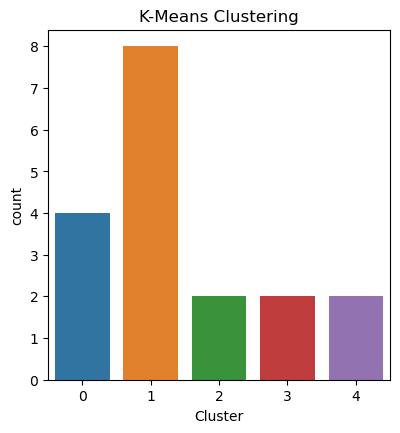

In [82]:
# Plot count plots for each algorithm's clustering results
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Cluster', data=kmeans_df)
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'DBSCAN Clustering')

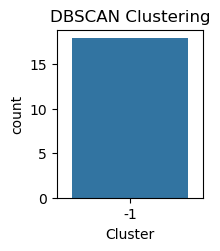

In [83]:
plt.subplot(2, 3, 2)
sns.countplot(x='Cluster', data=dbscan_df)
plt.title('DBSCAN Clustering')

Text(0.5, 1.0, 'Agglomerative Clustering')

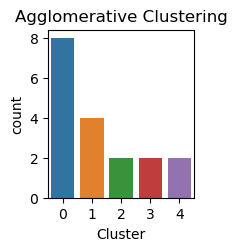

In [84]:
plt.subplot(2, 3, 3)
sns.countplot(x='Cluster', data=agg_df)
plt.title('Agglomerative Clustering')

Text(0.5, 1.0, 'Spectral Clustering')

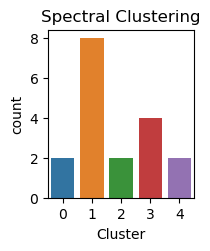

In [85]:
plt.subplot(2, 3, 4)
sns.countplot(x='Cluster', data=spectral_df)
plt.title('Spectral Clustering')